In [9]:
import yfinance as yf

# Tên chứng khoán bạn muốn tải dữ liệu
ticker_symbol = "AAPL"

# Ngày bắt đầu và kết thúc dữ liệu
start_date = "2022-10-01"
end_date = "2022-11-01"

# Tải dữ liệu từ Yahoo Finance theo ngày
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# In ra dữ liệu
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-03  138.210007  143.070007  137.690002  142.449997  141.423584   
2022-10-04  145.029999  146.220001  144.259995  146.100006  145.047302   
2022-10-05  144.070007  147.380005  143.009995  146.399994  145.345123   
2022-10-06  145.809998  147.539993  145.220001  145.429993  144.382126   
2022-10-07  142.539993  143.100006  139.449997  140.089996  139.080612   
2022-10-10  140.419998  141.889999  138.570007  140.419998  139.408234   
2022-10-11  139.899994  141.350006  138.220001  138.979996  137.978577   
2022-10-12  139.130005  140.360001  138.160004  138.339996  137.343201   
2022-10-13  134.990005  143.589996  134.369995  142.990005  141.959732   
2022-10-14  144.309998  144.520004  138.190002  138.380005  137.382919   
2022-10-17  141.070007  142.899994  140.270

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-02  171.220001  174.300003  170.929993  173.750000  173.521393   
2023-10-03  172.259995  173.630005  170.820007  172.399994  172.173172   
2023-10-04  171.089996  174.210007  170.970001  173.660004  173.431519   
2023-10-05  173.789993  175.449997  172.679993  174.910004  174.679871   
2023-10-06  173.800003  177.990005  173.179993  177.490005  177.256485   
2023-10-09  176.809998  179.050003  175.800003  178.990005  178.754501   
2023-10-10  178.100006  179.720001  177.949997  178.389999  178.155289   
2023-10-11  178.199997  179.850006  177.600006  179.800003  179.563431   
2023-10-12  180.070007  182.339996  179.039993  180.710007  180.472244   
2023-10-13  181.419998  181.929993  178.139999  178.850006  178.614685   
2023-10-16  176.750000  179.080002  176.509

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 24.49743137456979


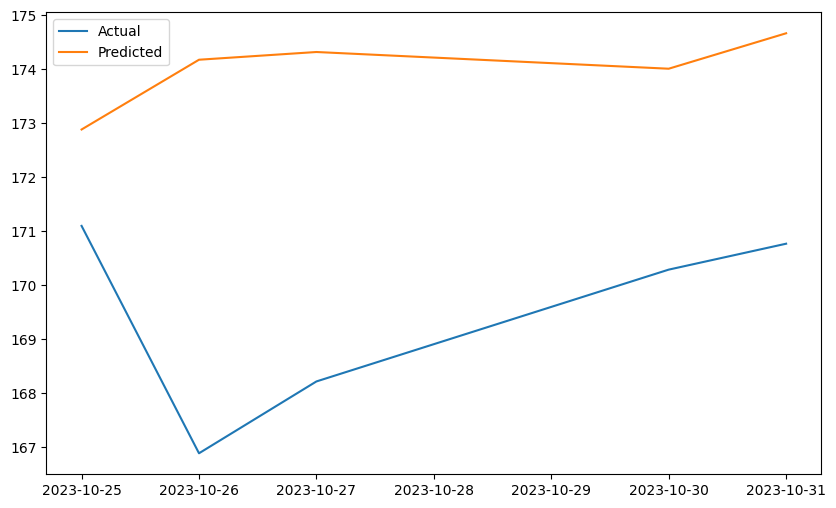

In [5]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Tên chứng khoán bạn muốn tải dữ liệu
ticker_symbol = "AAPL"

# Ngày bắt đầu và kết thúc dữ liệu
start_date = "2023-10-01"
end_date = "2023-11-01"

# Tải dữ liệu từ Yahoo Finance theo ngày
data = yf.download(ticker_symbol, start=start_date, end=end_date)
print(data)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Xây dựng mô hình ARIMA
model = ARIMA(train['Close'], order=(5, 1, 0))  # # Chọn p, d, q phù hợp 
model_fit = model.fit()

# Dự đoán giá trên tập kiểm tra
predictions = model_fit.forecast(steps=len(test))

# Đánh giá mô hình bằng cách tính mean squared error
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Vẽ đồ thị so sánh giá thực và giá dự đoán
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()

